### Pull in data set and create Points per game Assists per game and Rebounds per game

In [14]:
import pandas as pd
import numpy as np

data_frame = pd.read_csv("nba_contracts_history.csv")
data_frame["PPG"] = data_frame["PTS"]/(data_frame["GP"])
data_frame["APG"] = data_frame["AST"]/(data_frame["GP"])
data_frame["RPG"] = data_frame["REB"]/(data_frame["GP"])
data_frame['AVG_SALARY'] = data_frame['AVG_SALARY']/1000000
data_frame.head()
data_frame.describe()


,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,+/-,PPG,APG,RPG
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,2015.241206,2017.507538,11.073609,25.934673,64.170854,34.216080,29.954774,1746.984925,813.447236,300.396985,...,328.331658,171.673367,103.386935,58.190955,39.633166,137.668342,62.874372,12.092567,2.587414,4.796731
std,2.065129,1.705219,7.897820,2.842810,19.573765,14.485749,13.019526,782.413267,499.930031,178.629457,...,226.106193,163.872237,70.889201,37.306859,43.348845,64.277732,227.681794,6.339048,2.250275,2.806811
min,2011.000000,2013.000000,0.823244,20.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-628.000000,0.000000,0.000000,0.500000
25%,2014.000000,2016.000000,4.767000,24.000000,59.000000,25.000000,20.500000,1246.500000,443.500000,166.500000,...,164.500000,74.000000,55.000000,34.500000,11.000000,97.500000,-83.500000,6.955592,1.133171,2.668680
50%,2015.000000,2018.000000,9.500000,25.000000,72.000000,35.000000,31.000000,1867.000000,734.000000,277.000000,...,286.000000,110.000000,85.000000,48.000000,23.000000,137.000000,44.000000,11.315068,1.823529,4.026316
75%,2017.000000,2019.000000,16.388897,28.000000,78.000000,45.000000,39.000000,2372.000000,1154.000000,427.500000,...,469.500000,211.000000,138.000000,77.500000,51.000000,181.500000,174.000000,16.170969,3.234428,6.410457
max,2019.000000,2020.000000,33.599500,36.000000,82.000000,64.000000,62.000000,3125.000000,2376.000000,743.000000,...,1226.000000,839.000000,374.000000,169.000000,269.000000,291.000000,839.000000,28.975610,11.652778,14.951220


In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_frame, test_size=0.2, random_state=123)
working_set = train_set.copy()

### Initial features for X will be points
### Initial target feature y will be salary
I chose my x values based on the thing that will affect outcomes of games the most. Since wins and losses are determined by which team scores the most points it made sense to me to chose points as my x value

My y value is salary because this will be an easy number to correlate with others such as the x value I chose

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [5]:
X = working_set[['PPG']] 
Y = working_set['AVG_SALARY']
reg.fit(X,Y)

LinearRegression()

In [6]:
print("The bias is " , reg.intercept_)
print("The feature coefficients are ", reg.coef_)

The bias is  -1.18757691223521
The feature coefficients are  [1.01561783]


-1.18757691223521 1.015617831208976


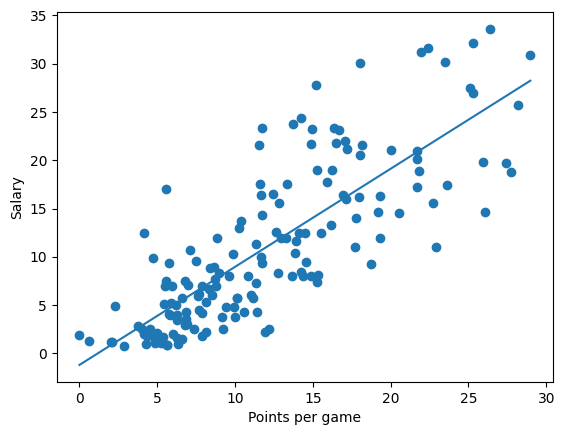

In [8]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
print(theta0, theta1)
def the_line(h, bias, coef):
    return bias + coef * h

min_points = working_set["PPG"].min()
min_salary = the_line(min_points, theta0, theta1)
max_points = working_set["PPG"].max()
max_salary = the_line(max_points, theta0, theta1)
line_x = [min_points, max_points]
line_y = [min_salary, max_salary]


import matplotlib.pyplot as plt
plt.scatter(working_set["PPG"], working_set["AVG_SALARY"])
plt.xlabel("Points per game")
plt.ylabel("Salary")
plt.plot(line_x, line_y)
plt.show()

In [9]:
print(reg.score(X,Y))

0.6436612302722176


64% of the predicted value is determined by the input

In [10]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)

from math import sqrt
rmse = sqrt(mse)
print("The root mean squared error is ", rmse)

mean squared error is  24.437874368135734
The root mean squared error is  4.943467848397088


In [11]:
some_ppg =[[26], [12], [20]]
predicted_salary = reg.predict(some_ppg)
print(predicted_salary)

[25.2184867  10.99983706 19.12477971]


C:\Users\s543532\wmvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### We can see that using just points gives us a decent model but if we add more features I'm certain we can do better

In [21]:
from sklearn.linear_model import LinearRegression
reg_plus = LinearRegression()

X = working_set[[ "PPG", "APG", "RPG"]]
Y = working_set["AVG_SALARY"]
reg_plus.fit(X, Y)

print(reg_plus.score(X,Y))
print(reg_plus.intercept_ , reg_plus.coef_)

0.6971901951831454
-2.93280851197213 [0.74624371 0.36692559 0.86173125]


-2.93280851197213 0.7462437080082146


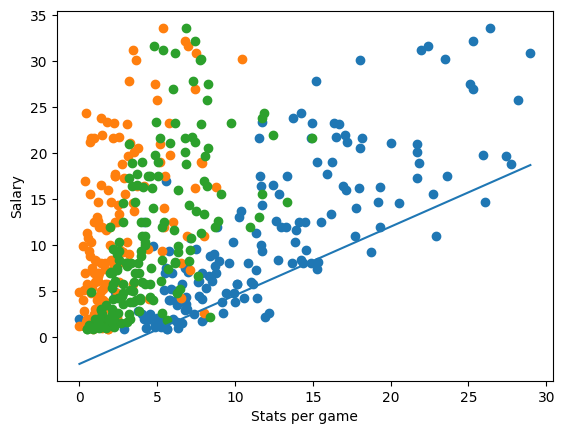

In [20]:
theta0 = reg_plus.intercept_
theta1 = reg_plus.coef_[0]
print(theta0, theta1)
def the_line(h, bias, coef):
    return bias + coef * h

min_features = working_set["PPG"].min()
min_salary = the_line(min_features, theta0, theta1)
max_features = working_set["PPG"].max()
max_salary = the_line(max_features, theta0, theta1)
line_x = [min_features, max_features]
line_y = [min_salary, max_salary]


import matplotlib.pyplot as plt
plt.scatter(working_set["PPG"], working_set["AVG_SALARY"])
plt.scatter(working_set['APG'], working_set['AVG_SALARY'])
plt.scatter(working_set['RPG'], working_set['AVG_SALARY'])
plt.xlabel("Stats per game")
plt.ylabel("Salary")
plt.plot(line_x, line_y)
plt.show()

### We see a 5% improvement when using stats per game that usually headline boxscores
### PPG is still a good predictor but the more stats the better
We already know from the initial exploration that as these numbers increase so does salary and now we are seing that with these predictions. 
Using linear regression we can see that we are on the right track to determining the salaries of NBA players. We see that the only feature we are using that does not have a large affect on the model is assists per game because its coefficient is insignificant compared to the others.